# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [ ]:
Answer a)

Imported on R

Answer b)

CODE:
wine <- read.csv("wine.csv", stringsAsFactors = FALSE)
str(wine)

OUTPUT:
'data.frame':	178 obs. of  14 variables:
 $ Alcohol                      : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malicacid                    : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                          : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash            : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                    : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols                : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols         : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins              : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity              : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                          : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ X0D280_0D315_of_diluted_wines: num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Proline                      : int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...
 $ class                        : int  1 1 1 1 1 1 1 1 1 1 ...


Answer c)

CODE:
wine <- read.csv("wine.csv", stringsAsFactors = FALSE)
num_cols <- sapply(wine, is.numeric)
summary(wine[, num_cols, drop = FALSE])

OUTPUT:

    Alcohol        Malicacid          Ash        Alcalinity_of_ash   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols Proanthocyanins
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60     Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300       Min.   :0.410  
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20     1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700       1st Qu.:1.250  
 Median :13.05   Median :1.865   Median :2.360   Median :19.50     Median : 98.00   Median :2.355   Median :2.135   Median :0.3400       Median :1.555  
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49     Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619       Mean   :1.591  
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50     3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375       3rd Qu.:1.950  
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00     Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600       Max.   :3.580  
 Color_intensity       Hue         X0D280_0D315_of_diluted_wines    Proline           class      
 Min.   : 1.280   Min.   :0.4800   Min.   :1.270                 Min.   : 278.0   Min.   :1.000  
 1st Qu.: 3.220   1st Qu.:0.7825   1st Qu.:1.938                 1st Qu.: 500.5   1st Qu.:1.000  
 Median : 4.690   Median :0.9650   Median :2.780                 Median : 673.5   Median :2.000  
 Mean   : 5.058   Mean   :0.9574   Mean   :2.612                 Mean   : 746.9   Mean   :1.938  
 3rd Qu.: 6.200   3rd Qu.:1.1200   3rd Qu.:3.170                 3rd Qu.: 985.0   3rd Qu.:3.000  
 Max.   :13.000   Max.   :1.7100   Max.   :4.000                 Max.   :1680.0   Max.   :3.000  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [1]:
#Answer a)

library(dplyr)

wine <- read.csv("wine.csv", stringsAsFactors = FALSE)

wine_scaled <- wine %>%
  mutate(across(-class, function(x) as.numeric(scale(x))))

wine_scaled


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


In [ ]:
answer b)
Scaling and centering first would be helpful as the summary table showed the variables are on very different scales and variances. 
For example, features like Proline, Color_intensity, and Magnesium vary far more than Ash or Nonflavanoid_phenols. 
PCA is variance-driven, so unscaled data would make those high-variance features overpower the other components. 
Centering could also help by removing mean offsets, making it so that the data is shown as varying from the mean rather than large or small numbers. 

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [ ]:
Answer a)

CODE:
wine <- read.csv("wine.csv", stringsAsFactors = FALSE)

# PCA on all features except 'class', with centering and scaling
features <- setdiff(names(wine), "class")
pca <- prcomp(wine[, features], center = TRUE, scale. = TRUE)

# Print results
print(summary(pca))
print(pca$rotation)


OUTPUT:
> # Print results
> print(summary(pca))
Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7     PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231 0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337 0.92018 0.94240 0.9617 0.97907 0.99205 1.00000
> print(pca$rotation)
                                       PC1          PC2         PC3         PC4         PC5         PC6         PC7         PC8         PC9        PC10
Alcohol                       -0.144329395 -0.483651548 -0.20738262 -0.01785630  0.26566365 -0.21353865 -0.05639636 -0.39613926 -0.50861912 -0.21160473
Malicacid                      0.245187580 -0.224930935  0.08901289  0.53689028 -0.03521363 -0.53681385  0.42052391 -0.06582674  0.07528304  0.30907994
Ash                            0.002051061 -0.316068814  0.62622390 -0.21417556  0.14302547 -0.15447466 -0.14917061  0.17026002  0.30769445  0.02712539
Alcalinity_of_ash              0.239320405  0.010590502  0.61208035  0.06085941 -0.06610294  0.10082451 -0.28696914 -0.42797018 -0.20044931 -0.05279942
Magnesium                     -0.141992042 -0.299634003  0.13075693 -0.35179658 -0.72704851 -0.03814394  0.32288330  0.15636143 -0.27140257 -0.06787022
Total_phenols                 -0.394660845 -0.065039512  0.14617896  0.19806835  0.14931841  0.08412230 -0.02792498  0.40593409 -0.28603452  0.32013135
Flavanoids                    -0.422934297  0.003359812  0.15068190  0.15229479  0.10902584  0.01892002 -0.06068521  0.18724536 -0.04957849  0.16315051
Nonflavanoid_phenols           0.298533103 -0.028779488  0.17036816 -0.20330102  0.50070298  0.25859401  0.59544729  0.23328465 -0.19550132 -0.21553507
Proanthocyanins               -0.313429488 -0.039301722  0.14945431  0.39905653 -0.13685982  0.53379539  0.37213935 -0.36822675  0.20914487 -0.13418390
Color_intensity                0.088616705 -0.529995672 -0.13730621  0.06592568  0.07643678  0.41864414 -0.22771214  0.03379692 -0.05621752  0.29077518
Hue                           -0.296714564  0.279235148  0.08522192 -0.42777141  0.17361452 -0.10598274  0.23207564 -0.43662362 -0.08582839  0.52239889
X0D280_0D315_of_diluted_wines -0.376167411  0.164496193  0.16600459  0.18412074  0.10116099 -0.26585107 -0.04476370  0.07810789 -0.13722690 -0.52370587
Proline                       -0.286752227 -0.364902832 -0.12674592 -0.23207086  0.15786880 -0.11972557  0.07680450 -0.12002267  0.57578611 -0.16211600
                                     PC11        PC12        PC13
Alcohol                        0.22591696  0.26628645 -0.01496997
Malicacid                     -0.07648554 -0.12169604 -0.02596375
Ash                            0.49869142  0.04962237  0.14121803
Alcalinity_of_ash             -0.47931378  0.05574287 -0.09168285
Magnesium                     -0.07128891 -0.06222011 -0.05677422
Total_phenols                 -0.30434119  0.30388245  0.46390791
Flavanoids                     0.02569409  0.04289883 -0.83225706
Nonflavanoid_phenols          -0.11689586 -0.04235219 -0.11403985
Proanthocyanins                0.23736257  0.09555303  0.11691707
Color_intensity               -0.03183880 -0.60422163  0.01199280
Hue                            0.04821201 -0.25921400  0.08988884
X0D280_0D315_of_diluted_wines -0.04642330 -0.60095872  0.15671813
Proline                       -0.53926983  0.07940162 -0.01444734


Answer b)

Explanation: PC1 explains 36.20% of the total variance. PC2 explains 19.21%. I used summary() to see this information.

Code:
wine <- read.csv("wine.csv", stringsAsFactors = FALSE)
features <- setdiff(names(wine), "class")
pca <- prcomp(wine[, features], center = TRUE, scale. = TRUE)

s <- summary(pca)  
pv <- s$importance["Proportion of Variance", 1:2]
cat(sprintf("PC1: %.2f%%\nPC2: %.2f%%\n", 100*pv[1], 100*pv[2]))

OUTPUT:
PC1: 36.20%
PC2: 19.21%


Answer c)
We are doing PCA first to simplify the dataset while keeping most of its information.
PCA converts the original variables (independent of correlation) into a smaller set of uncorrelated components 
that demonstrate the largest sources of variation. PCA reduces dimensionality, removes multicollinearity and makes further testing more stable and efficient. 
PCA also lets us visualize patterns and helps prevent models from overfitting.

Answer d)

CODE:

wine <- read.csv("wine.csv", stringsAsFactors = FALSE)
features <- setdiff(names(wine), "class")
pca <- prcomp(wine[, features], center = TRUE, scale. = TRUE)

print(round(pca$rotation, 4))

OUTPUT:

                                  PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10    PC11    PC12    PC13
Alcohol                       -0.1443 -0.4837 -0.2074 -0.0179  0.2657 -0.2135 -0.0564 -0.3961 -0.5086 -0.2116  0.2259  0.2663 -0.0150
Malicacid                      0.2452 -0.2249  0.0890  0.5369 -0.0352 -0.5368  0.4205 -0.0658  0.0753  0.3091 -0.0765 -0.1217 -0.0260
Ash                            0.0021 -0.3161  0.6262 -0.2142  0.1430 -0.1545 -0.1492  0.1703  0.3077  0.0271  0.4987  0.0496  0.1412
Alcalinity_of_ash              0.2393  0.0106  0.6121  0.0609 -0.0661  0.1008 -0.2870 -0.4280 -0.2004 -0.0528 -0.4793  0.0557 -0.0917
Magnesium                     -0.1420 -0.2996  0.1308 -0.3518 -0.7270 -0.0381  0.3229  0.1564 -0.2714 -0.0679 -0.0713 -0.0622 -0.0568
Total_phenols                 -0.3947 -0.0650  0.1462  0.1981  0.1493  0.0841 -0.0279  0.4059 -0.2860  0.3201 -0.3043  0.3039  0.4639
Flavanoids                    -0.4229  0.0034  0.1507  0.1523  0.1090  0.0189 -0.0607  0.1872 -0.0496  0.1632  0.0257  0.0429 -0.8323
Nonflavanoid_phenols           0.2985 -0.0288  0.1704 -0.2033  0.5007  0.2586  0.5954  0.2333 -0.1955 -0.2155 -0.1169 -0.0424 -0.1140
Proanthocyanins               -0.3134 -0.0393  0.1495  0.3991 -0.1369  0.5338  0.3721 -0.3682  0.2091 -0.1342  0.2374  0.0956  0.1169
Color_intensity                0.0886 -0.5300 -0.1373  0.0659  0.0764  0.4186 -0.2277  0.0338 -0.0562  0.2908 -0.0318 -0.6042  0.0120
Hue                           -0.2967  0.2792  0.0852 -0.4278  0.1736 -0.1060  0.2321 -0.4366 -0.0858  0.5224  0.0482 -0.2592  0.0899
X0D280_0D315_of_diluted_wines -0.3762  0.1645  0.1660  0.1841  0.1012 -0.2659 -0.0448  0.0781 -0.1372 -0.5237 -0.0464 -0.6010  0.1567
Proline                       -0.2868 -0.3649 -0.1267 -0.2321  0.1579 -0.1197  0.0768 -0.1200  0.5758 -0.1621 -0.5393  0.0794 -0.0144


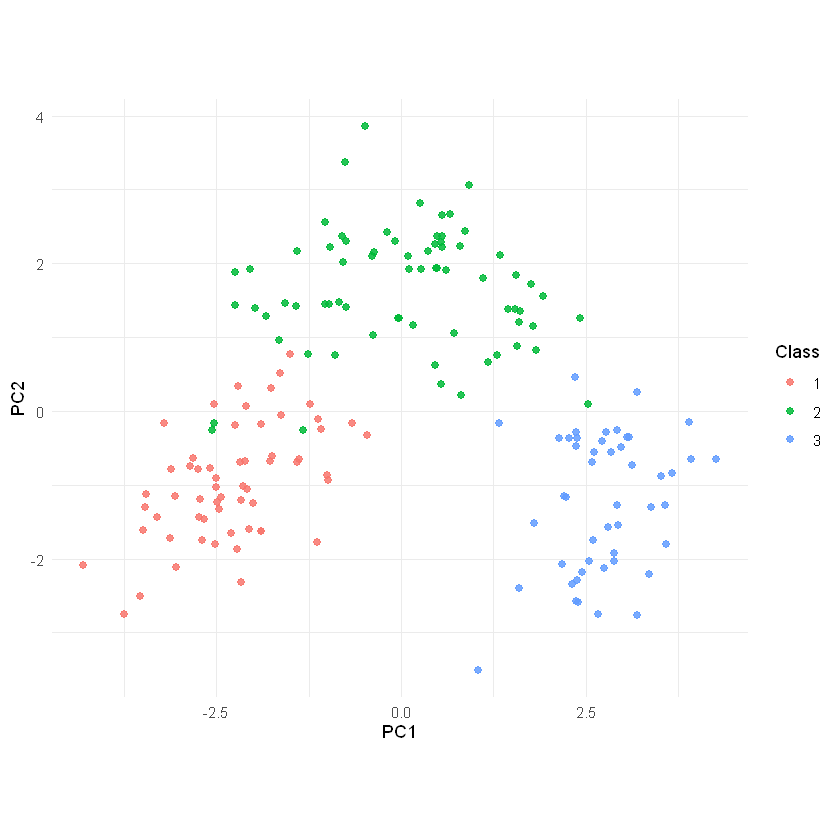

In [8]:
#Answer e)

library(dplyr)
library(ggplot2)

suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
})

wine <- read.csv("wine.csv", stringsAsFactors = FALSE)

# Scale and center all predictors except class
wine_scaled <- wine %>%
  mutate(across(-class, function(x) as.numeric(scale(x))))

# PCA on scaled predictors only
features <- setdiff(names(wine_scaled), "class")
pca <- prcomp(wine_scaled[, features], center = FALSE, scale. = FALSE)

# Keep PC1 and PC2, then add class for coloring
pc_df <- as.data.frame(pca$x[, 1:2]) %>%
  mutate(class = factor(wine_scaled$class))
names(pc_df)[1:2] <- c("PC1", "PC2")

# Plot
p <- ggplot(pc_df, aes(PC1, PC2, color = class)) +
  geom_point(size = 2, alpha = 0.85) +
  labs(color = "Class") +
  coord_equal() +
  theme_minimal()

print(p)


In [ ]:
Answer f)

Explanation: 
PC1 vs. PC2 forms three separate clusters where class 1 sits at negative PC1, 
class 3 sits at positive PC1 with lower PC2, and class 2 sits at higher PC2 near the middle. This means that the first two principal 
components already capture most of the class structure, further showing that the classes have distinct 
chemical profiles and are close to linearly separable.


Importance of components:
                          PC1    PC2
Standard deviation     1.0001 0.9999
Proportion of Variance 0.5001 0.4999
Cumulative Proportion  0.5001 1.0000
         PC1        PC2 class
1 -0.8871167  0.1614079 inner
2 -0.7848442  0.2547521 inner
3  0.7812241  0.4522914 inner
4 -0.8730728 -0.3028369 inner
5 -0.1214129 -0.9225806 inner
6  0.4892416 -0.7102536 inner


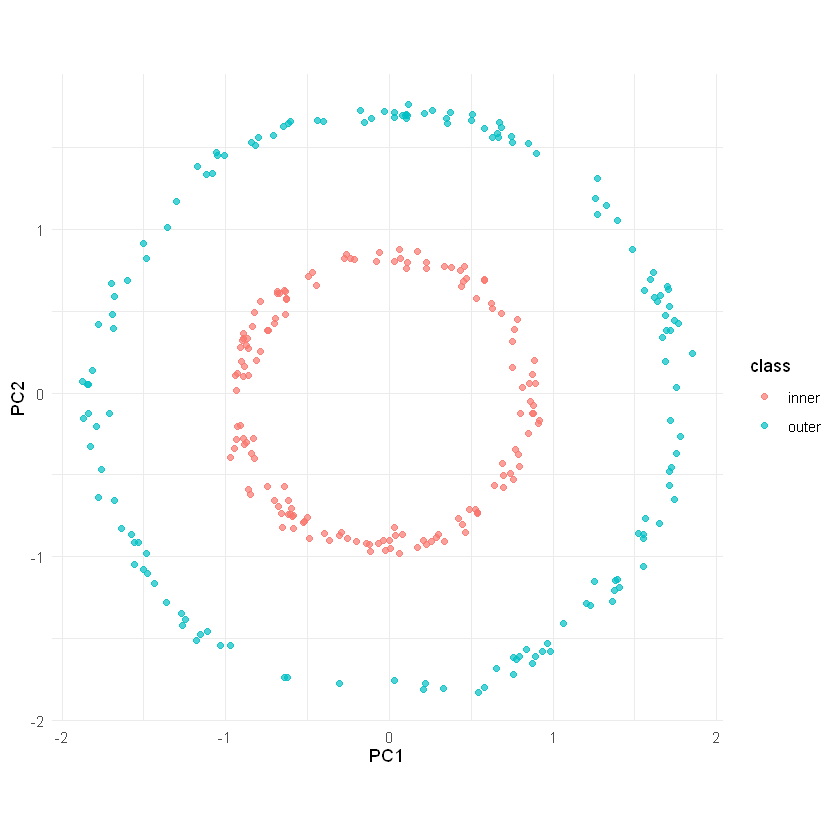

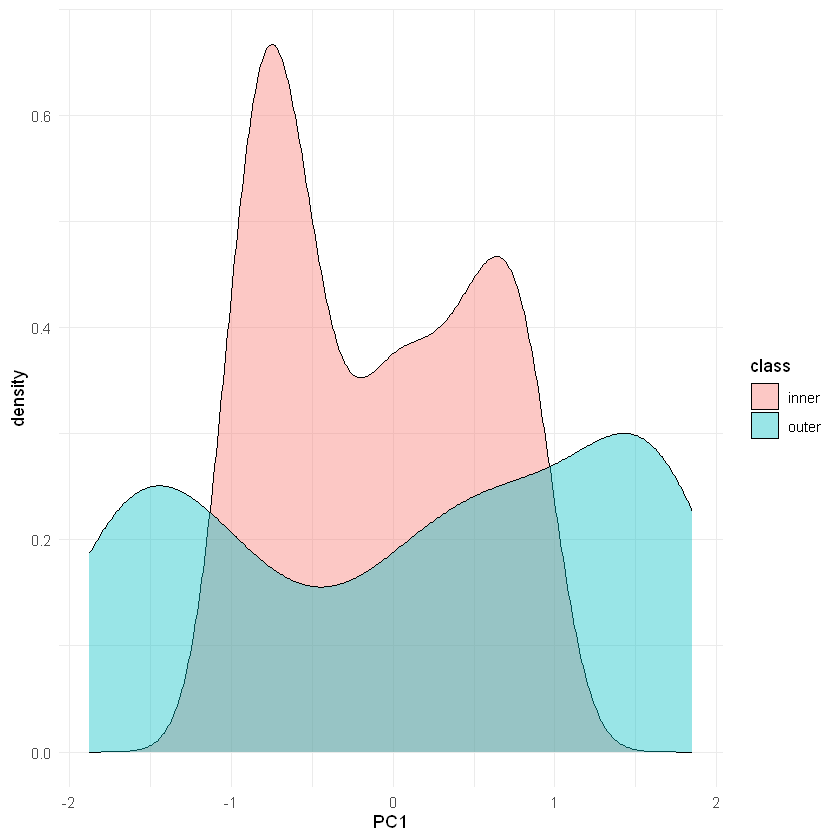

In [4]:
#Answer g)

#PCA fails on nonlinear structure. Example: two concentric circles. Any linear projection mixes classes; PC1 in 1D & cannot separate them.


#Simulation below shows PCA failure in concentric classes.

#Seen from the simulation
#1.The PC1–PC2 scatter still shows two concentric rings. 
#2.PCA only rotates and rescales; it can’t “unroll” radial separation.
#3.The PC1 density curves overlap heavily, so a 1-D PCA projection can’t separate the classes.
#4.The variance table shows ~50% / ~50%. No dominant linear direction captures the class signal.

#EXAMPLE SIMULATION TO SHOW:

suppressPackageStartupMessages({
  library(ggplot2)
})

set.seed(42)
n <- 300
t1 <- runif(n/2, 0, 2*pi); t2 <- runif(n/2, 0, 2*pi)
r1 <- 1 + rnorm(n/2, sd = 0.05); r2 <- 2 + rnorm(n/2, sd = 0.05)
x <- c(r1*cos(t1), r2*cos(t2))
y <- c(r1*sin(t1), r2*sin(t2))
class <- factor(rep(c("inner","outer"), each = n/2))
df <- data.frame(x, y, class)

pca <- prcomp(df[, c("x","y")], center = TRUE, scale. = TRUE)

# Show variance explained
print(summary(pca))

# PCs with labels
pc <- as.data.frame(pca$x[, 1:2])
names(pc) <- c("PC1","PC2")
pc$class <- class
print(head(pc, 6))

# Scatter in PC space: rings persist (linear PCs can’t separate)
p1 <- ggplot(pc, aes(PC1, PC2, color = class)) +
  geom_point(alpha = 0.7) + coord_equal() + theme_minimal()
print(p1)

# 1D projection onto PC1: heavy overlap → PCA reduction fails
p2 <- ggplot(pc, aes(PC1, fill = class)) +
  geom_density(alpha = 0.4) + theme_minimal()
print(p2)




In [ ]:
Answer h)
A vector space has global linear structure. You can add any two vectors, scale them, and express every point in one fixed basis. 
PCA uses this to find a linear subspace with axes that are global directions of maximum variance.

A manifold lacks a single global linear basis. It only looks Euclidean locally, but globally it 
can curve or fold. Distances along the manifold (geodesics) are different than the straight-line distances in the vector space.

T-SNE assumes the manifold hypothesis that high-dimensional data is often found near a low-dimensional manifold embedded 
in a vector space. T-SNE builds a 2D/3D embedding that preserves local neighborhoods on that manifold, not a global linear 
structure. Resulting axes have no meaning, large between-cluster distances are not reliable, and separation reflects local 
manifold geometry, not variance along global linear directions.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [ ]:
Answer a)

CODE:

# Install once if needed
if (!requireNamespace("Rtsne", quietly = TRUE)) install.packages("Rtsne")

library(Rtsne)

set.seed(123)

wine <- read.csv("wine.csv", stringsAsFactors = FALSE)

# PCA on predictors
features <- setdiff(names(wine), "class")
pca <- prcomp(wine[, features], center = TRUE, scale. = TRUE)

# PCs 1–10 + class, drop duplicate PC rows
pc10 <- as.data.frame(pca$x[, 1:10])
pc10$class <- wine$class
pc10_nodup <- pc10[!duplicated(pc10[, 1:10]), ]

# t-SNE
tsne <- Rtsne(as.matrix(pc10_nodup[, 1:10]), perplexity = 30, check_duplicates = FALSE)

# Print embedding with class
embedding <- data.frame(TSNE1 = tsne$Y[,1], TSNE2 = tsne$Y[,2], class = factor(pc10_nodup$class))
print(embedding)

OUTPUT:

          TSNE1        TSNE2 class
1   -6.98360838 -9.508367354     1
2   -7.50247350 -3.406002136     1
3   -6.91786693 -6.727787178     1
4   -8.99372237 -8.636535051     1
5   -3.43649920 -5.985566359     1
6   -8.79916081 -7.622504236     1
7   -8.03071939 -5.380921869     1
8   -4.89343234 -7.243831472     1
9   -8.63238857 -5.734522976     1
10  -7.74628846 -7.967131490     1
11  -8.32482355 -6.594910460     1
12  -7.58647798 -4.543254364     1
13  -7.61218870 -5.202959754     1
14  -9.99733054 -6.951831338     1
15  -9.88357347 -7.207780999     1
16  -5.71203667 -6.463336793     1
17  -5.54475273 -6.991771359     1
18  -5.22715163 -6.565563049     1
19  -9.29664840 -7.652995303     1
20  -5.07889499 -8.975923605     1
21  -6.87668440 -9.389809464     1
22  -3.14361980 -7.878908939     1
23  -6.74777965 -4.849665046     1
24  -5.43866948 -4.138648525     1
25  -4.77901591 -4.402828424     1
26  -2.75108692 -5.874396502     1
27  -6.19347079 -5.294437586     1
28  -6.99947049 -3.786604760     1
29  -4.47450941 -5.813667308     1
30  -7.65047742 -5.108332864     1
31  -6.65264772 -6.635103995     1
32  -7.72977905 -6.779070143     1
33  -6.37277776 -4.399209682     1
34  -4.42520811 -6.600644908     1
35  -5.22907471 -5.330827281     1
36  -4.99926551 -4.632533944     1
37  -5.14179684 -5.587280547     1
38  -5.70002395 -4.358775078     1
39  -6.83596945 -3.298721289     1
40  -5.22478571 -9.562869577     1
41  -7.00130640 -8.937070438     1
42  -3.11420478 -8.342330189     1
43  -8.15005150 -8.812592548     1
44  -3.13458837 -8.338521987     1
45  -6.73118716 -8.432060753     1
46  -4.32861913 -8.907321844     1
47  -5.81203253 -9.431736270     1
48  -7.43597364 -8.323643037     1
49  -7.37987615 -6.901196764     1
50  -8.25611446 -7.330075544     1
51  -9.80404727 -5.951599638     1
52  -7.61796078 -6.082477052     1
53  -8.86124705 -8.668159516     1
54  -5.53114286 -6.634072718     1
55  -6.42878148 -8.562041208     1
56  -6.87782795 -7.439057368     1
57  -7.09474103 -8.937367383     1
58  -6.13255476 -6.032426998     1
59  -8.35065158 -8.274155069     1
60   2.98983874 -1.131914820     2
61   3.16183176  5.776703407     2
62   3.81901053  5.972618435     2
63  -3.16003038  2.218926746     2
64  -3.41461782 -0.880628356     2
65   1.44657083  3.892436299     2
66  -3.84827815 -2.403754134     2
67  -4.08837805  0.003382333     2
68  -2.00125227  1.394960951     2
69   3.24600224  5.869698749     2
70  -7.60613358 -0.134235517     2
71   3.83138970  3.964107030     2
72  -3.65140984 -3.884600710     2
73  -0.91239947  2.398012696     2
74  -2.72569983 -6.093113680     2
75  -2.57639660 -1.804153857     2
76  -2.05906026  2.682109055     2
77  -3.10747467  1.768685134     2
78   3.36412379  4.188503646     2
79  -7.60654792 -0.147142284     2
80   0.40841116 -1.691039048     2
81  -2.46851946  0.911517431     2
82  -2.28892460 -0.004701718     2
83   0.95421960  2.616591381     2
84   8.36724638  4.684469683     2
85  -1.68488530 -2.090057113     2
86  -2.09115660  0.712127502     2
87   1.14752551  3.013732497     2
88   0.94453425  2.673896833     2
89   1.76949461  2.101002669     2
90   0.79801579  1.848141987     2
91   2.21154749  2.636576994     2
92   2.16565239  2.422333777     2
93   2.80037261  2.638977749     2
94  -1.11125150 -0.424350899     2
95  -2.33985987 -0.874985943     2
96  -7.65969010 -0.204727930     2
97   5.12012850  9.036937288     2
98  -2.78125517  0.678845699     2
99  -3.52772425 -0.959410922     2
100  0.09200589 -1.726201354     2
101 -2.85722746  1.240752171     2
102 -1.82805807  1.938889985     2
103  0.38991706 -0.206935958     2
104 -1.13963938  1.338441743     2
105 -1.45303478  0.785074968     2
106  3.17504203  1.900180526     2
107 -0.88873077  1.215760920     2
108  2.57858453  2.376808581     2
109 -0.96095164  0.645228097     2
110 -1.67366878 -2.345283724     2
111 -0.07890675 -3.454454430     2
112 -0.43548188  0.120066958     2
113  2.09084099  4.249424531     2
114  1.11334311  1.900998342     2
115  0.99735181  0.763354937     2
116  0.16335019  3.341054198     2
117 -0.97392569  1.073517575     2
118 -0.19199120  1.153330869     2
119  5.60801638  5.164393818     2
120 -0.76637826 -0.050193439     2
121 -1.15944999 -1.961205282     2
122 -2.15321216 -5.515463683     2
123 -0.31018639  4.115633425     2
124  0.85796683 -3.398538536     2
125  0.16560856 -3.354551129     2
126  0.01355985  0.078259234     2
127  0.40903413 -0.254527061     2
128  2.04996165  1.350596242     2
129  0.57988842  0.803111391     2
130  2.54835863  0.434931393     2
131  5.84709292  8.631303292     3
132  6.85899547  8.187576329     3
133  7.04748433  8.309078111     3
134  6.80860318  8.524031096     3
135  5.23833286  6.135826721     3
136  5.92393628  6.202771890     3
137  9.07802192  4.295970444     3
138  9.13062049  4.008838140     3
139  8.14350575  5.516068456     3
140  7.09822598  4.414115202     3
141  7.09681613  4.663163911     3
142  7.05735254  6.424842255     3
143  7.16038533  4.531638312     3
144  8.63680888  5.085908821     3
145  7.44726908  8.051457178     3
146  7.31971460  6.736767911     3
147  9.67929390  5.117301830     3
148  9.36772728  6.096065010     3
149  9.29950388  7.152586218     3
150  8.64302750  8.535072324     3
151  8.69211557  9.572943353     3
152  8.38583200  9.270096416     3
153  8.66457283  9.825546992     3
154 10.54375280  7.550794423     3
155  5.80721070  6.695326897     3
156 10.12579259  6.019409163     3
157  9.88885477  6.859311913     3
158  7.95330306  3.860738130     3
159 11.66342252  8.511370447     3
160 11.56398751  8.450620266     3
161  9.08534258  6.384669805     3
162  7.32909806  5.256407314     3
163  7.35094708  4.587220297     3
164  7.18643441  7.023859267     3
165  8.98678445  7.365804034     3
166  9.02970380  5.476500988     3
167  9.44427810  8.607136701     3
168  8.66905601  7.146374174     3
169  9.34639366  8.856817547     3
170  9.29508959  9.776180164     3
171  6.86212785  6.984985504     3
172  8.23453953  7.013382161     3
173  9.58313335  7.464841979     3
174  9.97477167  5.786026449     3
175  9.23297615  7.739164211     3
176  9.49163187  8.376086451     3
177 10.00180927  8.388456777     3
178 10.53642340  6.854349718     3

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`."


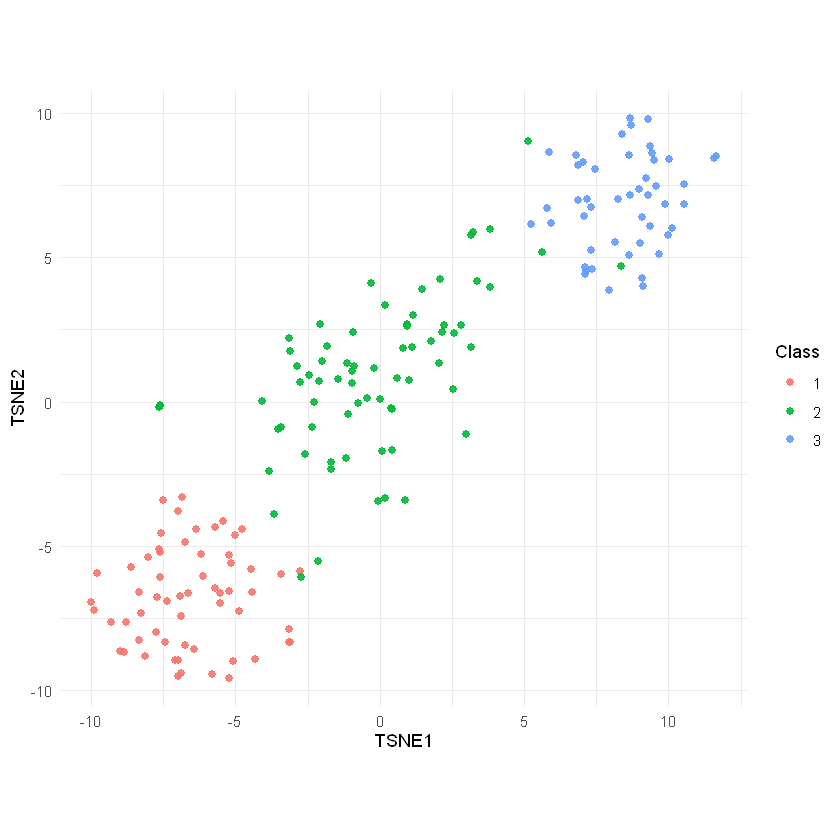

In [9]:
#Answer b)

# T-SNE plot of PCs 1–10 colored by class
set.seed(123)

# Install if needed
if (!requireNamespace("Rtsne", quietly = TRUE)) install.packages("Rtsne")

library(dplyr)
library(tibble)
library(ggplot2)
library(Rtsne)

# Load data
wine <- read.csv("wine.csv", stringsAsFactors = FALSE)

# PCA on predictors only
features <- setdiff(names(wine), "class")
pca <- prcomp(wine[, features], center = TRUE, scale. = TRUE)

# Use PCs 1–10 and add class; drop duplicate PC rows
pc10 <- as.data.frame(pca$x[, 1:10])
pc10$class <- wine$class
pc10_nodup <- pc10[!duplicated(pc10[, 1:10]), ]

# T-SNE on PCs 1–10
tsne <- Rtsne(as.matrix(pc10_nodup[, 1:10]), perplexity = 30, check_duplicates = FALSE)

# Plot
tsne_tbl <- as_tibble(tsne$Y) %>%
  rename(TSNE1 = V1, TSNE2 = V2) %>%
  mutate(class = factor(pc10_nodup$class))

p <- ggplot(tsne_tbl, aes(TSNE1, TSNE2, color = class)) +
  geom_point(size = 2, alpha = 0.9) +
  labs(color = "Class") +
  coord_equal() +
  theme_minimal()

print(p)


In [ ]:
Answer c)

We did not stop at PCA because it is linear and optimizes global variance, but we needed to see neighborhood structure and class separation. 
In our data, PC1+PC2 captured \~55% of variance, but classes still overlapped. T-SNE keeps local 
neighborhoods on a curve, so it was used to reveal nonlinear clusters and separate classes more clearly visually. 
Using both PCA and t-SNE for this dataset helped with interpreting the data and showing its nonlinear structure.

In [ ]:
Answer d)
Since this combined PCA and t-SNE method suits visually displaying the linear correlations in high-dimensional data, other possible datasets that would work include single-cell RNA-sequences, cytometry profiles, bulk gene expression 
or other heavy text-based matrices.